# Deep Learningによるirisの品種予測

## irisデータの読み込みと表示

In [14]:
from google.colab import drive
import itertools
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import sys

drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Development/Github/sklearn_iris/modules/')

from sgd import *
from twoLayerNet import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
iris = load_iris()
features = iris.data
feature_names = iris.feature_names
targets = iris.target
target_names = iris.target_names

In [30]:
iris_data = pd.DataFrame(features, columns=feature_names)
iris_target = pd.DataFrame(targets, columns=["type"])
iris_all = pd.concat([iris_data, iris_target], axis=1)
iris_all.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## irisデータの分布図

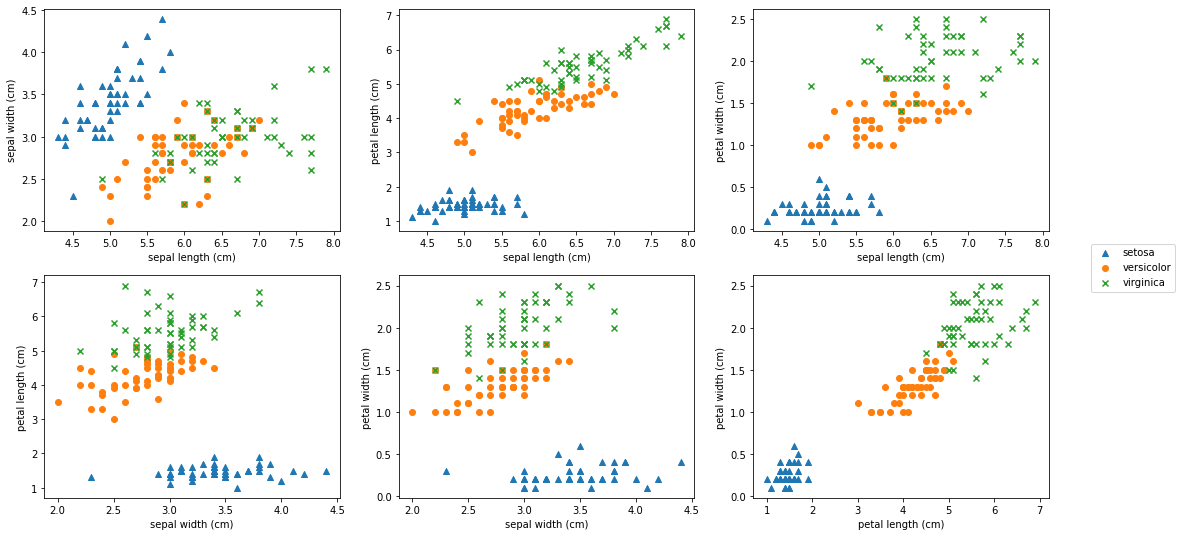

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
one_dim_axes = axes.ravel()

for ax, (x, y) in enumerate(itertools.combinations(range(4), 2)):
    for iris_type, marker in zip(range(3), '^ox'):
        one_dim_axes[ax].scatter(features[targets == iris_type, x], 
                                 features[targets == iris_type, y], 
                                 label=target_names[iris_type], marker=marker)
        one_dim_axes[ax].set_xlabel(feature_names[x])
        one_dim_axes[ax].set_ylabel(feature_names[y])

lines, labels = one_dim_axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'right')
plt.show()

## ニューラルネットワークの学習

In [25]:
# 目的変数をone-hot表現に変換
targets_onehot = np_utils.to_categorical(targets)

# irisデータを訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(features, targets_onehot, random_state=0) 

In [26]:
DATA_SIZE = len(x_train)  # 訓練データのサイズ
HIDDEN_SIZE = 10          # 隠れ層のサイズ
LEARNING_RATE = 0.3       # 学習率
MAX_EPOCH = 300           # エポック数

loss_list = []
accuracy_list = []
model = TwoLayerNet(input_size=4, hidden_size=HIDDEN_SIZE, output_size=3)
optimizer = Sgd(lr=LEARNING_RATE)

for epoch in range(MAX_EPOCH):
    # データをシャッフル
    idx = np.random.permutation(DATA_SIZE)
    x = x_train[idx]
    t = y_train[idx]

    # パラメータを修正
    loss = model.forward(x, t)
    model.backward()
    optimizer.update(model.params, model.grads)
    loss_list.append(loss)

    # 検証・正解率を算出
    score = model.predict(x_test)
    predict = np.argmax(score, axis=1)
    correct = np.argmax(y_test, axis=1)

    count = 0
    testdata_num = predict.size

    for i in range(testdata_num):
        if predict[i] == correct[i]: count += 1
    accuracy_list.append(count / testdata_num * 100)

## 学習過程と予測結果

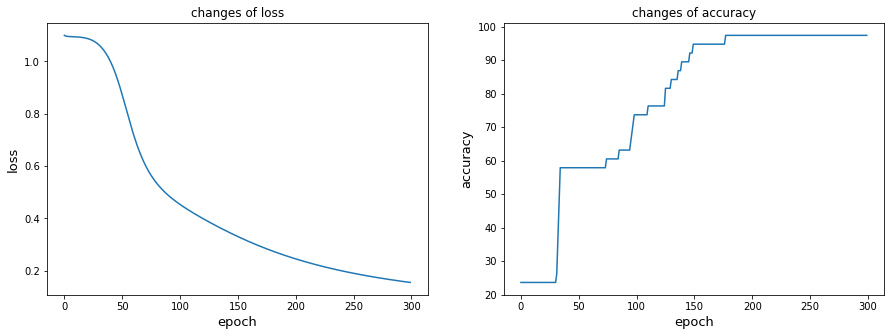

最小損失: 0.15
最大損失: 1.1
最小正解率: 23.68
最大正解率: 97.37


In [40]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot(np.arange(len(loss_list)), loss_list)
ax.set_xlabel('epoch', fontsize=13)
ax.set_ylabel('loss', fontsize=13)
ax.set_title('changes of loss')

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(len(accuracy_list)), accuracy_list)
ax2.set_xlabel('epoch', fontsize=13)
ax2.set_ylabel('accuracy', fontsize=13)
ax2.set_title('changes of accuracy')
plt.show()

min_loss = min(loss_list)
max_loss = max(loss_list)
min_accuracy = min(accuracy_list)
max_accuracy = max(accuracy_list)

print(f"最小損失: {round(min_loss, 2)}")
print(f"最大損失: {round(max_loss, 2)}")
print(f"最小正解率: {round(min_accuracy, 2)}")
print(f"最大正解率: {round(max_accuracy, 2)}")